In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# **Import datasets**

In [ ]:
# Import with pandas
import os
import pandas as pd


# Define directory where all CSV files are stored
dir_path = "/content/drive/MyDrive/Colab Notebooks/datas/TSLA"

# Get a list of all the CSV filenames in the directory
all_files = [os.path.join(dir_path, filename) for filename in os.listdir(dir_path) if filename.endswith('.csv')]

# Read each file and append its content to a list of DataFrames
dfs = [pd.read_csv(file, parse_dates=["Datetime"], index_col=["Datetime"]) for file in all_files]

# Combine all the DataFrames into one
df = pd.concat(dfs, axis=0)

# Sort the DataFrame by its index (which is the date)
df = df.sort_index()

df = df[['Open','High','Low','Close','Adj Close']]

df.head(50)


,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-01-03 09:30:00-05:00,1147.750000,1166.926147,1136.040039,1152.005005,1152.005005
2022-01-03 10:30:00-05:00,1152.050049,1174.089966,1150.510010,1165.835938,1165.835938
2022-01-03 11:30:00-05:00,1165.000000,1171.339966,1160.339966,1167.000000,1167.000000
2022-01-03 12:30:00-05:00,1167.181396,1178.579956,1165.780029,1175.660034,1175.660034
2022-01-03 13:30:00-05:00,1175.744141,1187.729980,1174.270020,1185.696045,1185.696045
2022-01-03 14:30:00-05:00,1185.660034,1200.000000,1182.020020,1192.560059,1192.560059
2022-01-03 15:30:00-05:00,1192.579956,1201.069946,1187.400146,1199.650024,1199.650024
2022-01-04 09:30:00-05:00,1189.550049,1206.816772,1175.119995,1186.331055,1186.331055
2022-01-04 10:30:00-05:00,1186.170044,1188.939941,1123.050049,1134.325317,1134.325317


Import testing (prediction) dataset

In [ ]:
# Import with pandas
import os
import pandas as pd

# Define directory where all CSV files are stored
dir_path2 = "/content/drive/MyDrive/Colab Notebooks/datas/TSLA"

# Get a list of all the CSV filenames in the directory
all_files2 = [os.path.join(dir_path2, filename) for filename in os.listdir(dir_path2) if filename.endswith('.csv')]

# Read each file and append its content to a list of DataFrames
dfs2 = [pd.read_csv(file, parse_dates=["Datetime"], index_col=["Datetime"]) for file in all_files2]

# Combine all the DataFrames into one
df2 = pd.concat(dfs2, axis=0)

# Sort the DataFrame by its index (which is the date)
df2 = df2.sort_index()

df2 = df2[['Open','High','Low','Close','Adj Close']]

df2.tail(50)

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2023-09-06 15:30:00-04:00,251.649994,252.240005,251.231598,251.990005,251.990005
2023-09-07 09:30:00-04:00,245.070007,248.699997,243.264999,245.119995,245.119995
2023-09-07 10:30:00-04:00,245.145004,246.940002,243.509995,246.330002,246.330002
2023-09-07 11:30:00-04:00,246.369995,250.389999,245.800003,249.710007,249.710007
2023-09-07 12:30:00-04:00,249.710007,251.199997,248.910004,250.820007,250.820007
2023-09-07 13:30:00-04:00,250.889999,252.809998,250.300003,250.846695,250.846695
2023-09-07 14:30:00-04:00,250.860001,252.190002,250.210007,251.664993,251.664993
2023-09-07 15:30:00-04:00,251.669098,252.339905,251.000000,251.490005,251.490005
2023-09-08 09:30:00-04:00,252.039993,256.519989,251.979996,254.764999,254.764999


Add one more row in test (predict) dataset for prediction purposes

In [ ]:
# Extract the last date in the index
last_date = df2.index[-1]

# Add one day to the date and set the time to 09:30:00-04:00
new_date = pd.Timestamp(last_date.date() + pd.Timedelta(days=1), tz='US/Eastern').replace(hour=9, minute=30)

# Append the new date to the DataFrame with NaN values for all columns
df2.loc[new_date] = [pd.NA] * len(df2.columns)

df2.tail(10)

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2023-09-14 14:30:00-04:00,275.445007,276.709412,274.930115,275.589996,275.589996
2023-09-14 15:30:00-04:00,275.579987,276.440002,275.269989,276.019989,276.019989
2023-09-15 09:30:00-04:00,278.931000,278.980011,271.649994,275.000000,275.000000
2023-09-15 10:30:00-04:00,275.019989,276.040009,272.790009,273.907593,273.907593
2023-09-15 11:30:00-04:00,273.893799,275.600006,273.529999,275.277405,275.277405
2023-09-15 12:30:00-04:00,275.286407,276.557007,274.299988,274.570007,274.570007
2023-09-15 13:30:00-04:00,274.589996,275.029999,271.420013,271.690002,271.690002
2023-09-15 14:30:00-04:00,271.728302,273.849304,271.000000,273.510010,273.510010
2023-09-15 15:30:00-04:00,273.549988,278.000000,272.769989,274.410004,274.410004


# **Perform Windowing**

In [ ]:
WINDOW_SIZE=21
HORIZON=7

In [ ]:
# Make a copy of the stock historical data
df_windowed = df.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  df_windowed[f"Open-{WINDOW_SIZE-i}"] = df_windowed["Open"].shift(periods=i+1)
  df_windowed[f"High-{WINDOW_SIZE-i}"] = df_windowed["High"].shift(periods=i+1)
  df_windowed[f"Low-{WINDOW_SIZE-i}"] = df_windowed["Low"].shift(periods=i+1)
  df_windowed[f"Close-{WINDOW_SIZE-i}"] = df_windowed["Close"].shift(periods=i+1)
  df_windowed[f"Adj Close-{WINDOW_SIZE-i}"] = df_windowed["Adj Close"].shift(periods=i+1)

df_windowed.head(10)


<ipython-input-9-cc1c6c76878f>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_windowed[f"Adj Close-{WINDOW_SIZE-i}"] = df_windowed["Adj Close"].shift(periods=i+1)
<ipython-input-9-cc1c6c76878f>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_windowed[f"Open-{WINDOW_SIZE-i}"] = df_windowed["Open"].shift(periods=i+1)
<ipython-input-9-cc1c6c76878f>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

,Open,High,Low,Close,Adj Close,Open-21,High-21,Low-21,Close-21,Adj Close-21,...,Open-2,High-2,Low-2,Close-2,Adj Close-2,Open-1,High-1,Low-1,Close-1,Adj Close-1
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:30:00-05:00,1147.750000,1166.926147,1136.040039,1152.005005,1152.005005,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 10:30:00-05:00,1152.050049,1174.089966,1150.510010,1165.835938,1165.835938,1147.750000,1166.926147,1136.040039,1152.005005,1152.005005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 11:30:00-05:00,1165.000000,1171.339966,1160.339966,1167.000000,1167.000000,1152.050049,1174.089966,1150.510010,1165.835938,1165.835938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 12:30:00-05:00,1167.181396,1178.579956,1165.780029,1175.660034,1175.660034,1165.000000,1171.339966,1160.339966,1167.000000,1167.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 13:30:00-05:00,1175.744141,1187.729980,1174.270020,1185.696045,1185.696045,1167.181396,1178.579956,1165.780029,1175.660034,1175.660034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 14:30:00-05:00,1185.660034,1200.000000,1182.020020,1192.560059,1192.560059,1175.744141,1187.729980,1174.270020,1185.696045,1185.696045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 15:30:00-05:00,1192.579956,1201.069946,1187.400146,1199.650024,1199.650024,1185.660034,1200.000000,1182.020020,1192.560059,1192.560059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04 09:30:00-05:00,1189.550049,1206.816772,1175.119995,1186.331055,1186.331055,1192.579956,1201.069946,1187.400146,1199.650024,1199.650024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04 10:30:00-05:00,1186.170044,1188.939941,1123.050049,1134.325317,1134.325317,1189.550049,1206.816772,1175.119995,1186.331055,1186.331055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Make a copy of the stock historical data
df_windowed2 = df2.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  df_windowed2[f"Open-{WINDOW_SIZE-i}"] = df_windowed2["Open"].shift(periods=i+1)
  df_windowed2[f"High-{WINDOW_SIZE-i}"] = df_windowed2["High"].shift(periods=i+1)
  df_windowed2[f"Low-{WINDOW_SIZE-i}"] = df_windowed2["Low"].shift(periods=i+1)
  df_windowed2[f"Close-{WINDOW_SIZE-i}"] = df_windowed2["Close"].shift(periods=i+1)
  df_windowed2[f"Adj Close-{WINDOW_SIZE-i}"] = df_windowed2["Adj Close"].shift(periods=i+1)

df_windowed2.tail(10)


<ipython-input-10-1ea3b56fd1fe>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_windowed2[f"Adj Close-{WINDOW_SIZE-i}"] = df_windowed2["Adj Close"].shift(periods=i+1)
<ipython-input-10-1ea3b56fd1fe>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_windowed2[f"Open-{WINDOW_SIZE-i}"] = df_windowed2["Open"].shift(periods=i+1)
<ipython-input-10-1ea3b56fd1fe>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

,Open,High,Low,Close,Adj Close,Open-21,High-21,Low-21,Close-21,Adj Close-21,...,Open-2,High-2,Low-2,Close-2,Adj Close-2,Open-1,High-1,Low-1,Close-1,Adj Close-1
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-14 14:30:00-04:00,275.445007,276.709412,274.930115,275.589996,275.589996,274.700012,275.910004,274.649994,275.450012,275.450012,...,274.614990,274.640015,272.549988,273.644989,273.644989,274.170013,274.850006,273.529999,274.609985,274.609985
2023-09-14 15:30:00-04:00,275.579987,276.440002,275.269989,276.019989,276.019989,275.445007,276.709412,274.930115,275.589996,275.589996,...,270.760010,278.390015,268.329987,273.570007,273.570007,274.614990,274.640015,272.549988,273.644989,273.644989
2023-09-15 09:30:00-04:00,278.931000,278.980011,271.649994,275.000000,275.000000,275.579987,276.440002,275.269989,276.019989,276.019989,...,273.549988,275.500000,269.890015,271.679993,271.679993,270.760010,278.390015,268.329987,273.570007,273.570007
2023-09-15 10:30:00-04:00,275.019989,276.040009,272.790009,273.907593,273.907593,278.931000,278.980011,271.649994,275.000000,275.000000,...,271.690002,272.969910,270.600006,270.854401,270.854401,273.549988,275.500000,269.890015,271.679993,271.679993
2023-09-15 11:30:00-04:00,273.893799,275.600006,273.529999,275.277405,275.277405,275.019989,276.040009,272.790009,273.907593,273.907593,...,270.850891,271.140015,268.559998,270.576599,270.576599,271.690002,272.969910,270.600006,270.854401,270.854401
2023-09-15 12:30:00-04:00,275.286407,276.557007,274.299988,274.570007,274.570007,273.893799,275.600006,273.529999,275.277405,275.277405,...,270.589905,270.948212,266.600006,267.980011,267.980011,270.850891,271.140015,268.559998,270.576599,270.576599
2023-09-15 13:30:00-04:00,274.589996,275.029999,271.420013,271.690002,271.690002,275.286407,276.557007,274.299988,274.570007,274.570007,...,267.980011,268.420013,266.760010,268.088501,268.088501,270.589905,270.948212,266.600006,267.980011,267.980011
2023-09-15 14:30:00-04:00,271.728302,273.849304,271.000000,273.510010,273.510010,274.589996,275.029999,271.420013,271.690002,271.690002,...,268.100006,268.140015,266.890015,267.390015,267.390015,267.980011,268.420013,266.760010,268.088501,268.088501
2023-09-15 15:30:00-04:00,273.549988,278.000000,272.769989,274.410004,274.410004,271.728302,273.849304,271.000000,273.510010,273.510010,...,270.070007,274.980011,268.100006,270.569885,270.569885,268.100006,268.140015,266.890015,267.390015,267.390015


Drop 'Open' 'High' 'Low' and 'Adj Close' columns for the current datetime and 'Close' column as label

In [ ]:
feature_cols = [f"{col}-{i}" for i in range(WINDOW_SIZE, 0, -1) for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']]
X = df_windowed.dropna()[feature_cols]
y = df_windowed.dropna()['Close']
X, y

(                               Open-21      High-21       Low-21     Close-21  \
 Datetime                                                                        
 2022-01-06 09:30:00-05:00  1086.348267  1099.170044  1081.500000  1087.620117   
 2022-01-06 10:30:00-05:00  1077.000000  1084.599976  1020.500000  1041.869995   
 2022-01-06 11:30:00-05:00  1041.880005  1077.807739  1041.050049  1061.149902   
 2022-01-06 12:30:00-05:00  1061.739868  1069.020020  1049.109985  1063.581787   
 2022-01-06 13:30:00-05:00  1063.599976  1075.140015  1060.180054  1060.510010   
 ...                                ...          ...          ...          ...   
 2023-09-15 11:30:00-04:00   275.019989   276.040009   272.790009   273.907593   
 2023-09-15 12:30:00-04:00   273.893799   275.600006   273.529999   275.277405   
 2023-09-15 13:30:00-04:00   275.286407   276.557007   274.299988   274.570007   
 2023-09-15 14:30:00-04:00   274.589996   275.029999   271.420013   271.690002   
 2023-09-15 15:3

In [ ]:
# Step 1: Filter out columns with -WINDOW_SIZE to -1 suffix
suffixes_to_check = [f"-{i}" for i in range(WINDOW_SIZE, 0, -1)]
columns_to_check_for_nan = [col for col in df_windowed2.columns if any(suffix in col for suffix in suffixes_to_check)]

# Step 2: Drop rows only if there's a NaN in columns with the -WINDOW_SIZE to -1 suffix
indices_to_keep = df_windowed2.dropna(subset=columns_to_check_for_nan).index
df_filtered = df_windowed2.loc[indices_to_keep]

# Step 3: Drop columns 'Open', 'High', 'Low', and 'Adj Close' without the -7 to -1 suffixes
cols_to_exclude = ['Open', 'High', 'Low', 'Adj Close']
cols_to_drop = [col for col in df_filtered.columns if col in cols_to_exclude and not any(suffix in col for suffix in suffixes_to_check)]
df_filtered = df_filtered.drop(columns=cols_to_drop)

# Separating into X2 and y2
X2 = df_filtered.dropna().drop(columns=['Close'])
X2_withClose = df_filtered.drop(columns=['Close'])
y2 = df_windowed2.dropna()['Close']
y2_withClose = df_filtered['Close']

X2, X2_withClose, y2, y2_withClose

(                               Open-21      High-21       Low-21     Close-21  \
 Datetime                                                                        
 2022-01-06 09:30:00-05:00  1086.348267  1099.170044  1081.500000  1087.620117   
 2022-01-06 10:30:00-05:00  1077.000000  1084.599976  1020.500000  1041.869995   
 2022-01-06 11:30:00-05:00  1041.880005  1077.807739  1041.050049  1061.149902   
 2022-01-06 12:30:00-05:00  1061.739868  1069.020020  1049.109985  1063.581787   
 2022-01-06 13:30:00-05:00  1063.599976  1075.140015  1060.180054  1060.510010   
 ...                                ...          ...          ...          ...   
 2023-09-15 11:30:00-04:00   275.019989   276.040009   272.790009   273.907593   
 2023-09-15 12:30:00-04:00   273.893799   275.600006   273.529999   275.277405   
 2023-09-15 13:30:00-04:00   275.286407   276.557007   274.299988   274.570007   
 2023-09-15 14:30:00-04:00   274.589996   275.029999   271.420013   271.690002   
 2023-09-15 15:3

# **Splitting training and testing datasets**

In [ ]:
# Ensure timestamps you're using for indexing have timezone information.
start_train = pd.Timestamp('2022-04-30').tz_localize('US/Eastern')
end_train = pd.Timestamp('2023-04-30').tz_localize('US/Eastern')

start_val = pd.Timestamp('2023-05-01').tz_localize('US/Eastern')
end_val = pd.Timestamp('2023-08-01').tz_localize('US/Eastern')

# Splitting data using loc with ranges
X_train, y_train = X.loc[start_train:end_train], y.loc[start_train:end_train]
X_val, y_val = X.loc[start_val:end_val], y.loc[start_val:end_val]

len(X_train), len(y_train), len(X_val), len(y_val)

(1747, 1747, 438, 438)

In [ ]:
# Ensure timestamps you're using for indexing have timezone information.
start_test = pd.Timestamp('2023-09-07').tz_localize('US/Eastern')
end_test = pd.Timestamp('2023-09-17').tz_localize('US/Eastern')

# Splitting data using loc with ranges
X_test2, y_test2 = X2.loc[start_test:end_test], y2.loc[start_test:end_test]
X_test2_withClose, y_test2_withClose = X2_withClose.loc[start_test:end_test], y2_withClose.loc[start_test:end_test]

len(X_test2), len(y_test2), len(X_test2_withClose), len(y_test2_withClose)

(49, 49, 50, 50)

In [ ]:
X_test2

,Open-21,High-21,Low-21,Close-21,Adj Close-21,Open-20,High-20,Low-20,Close-20,Adj Close-20,...,Open-2,High-2,Low-2,Close-2,Adj Close-2,Open-1,High-1,Low-1,Close-1,Adj Close-1
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-07 09:30:00-04:00,251.649994,252.240005,251.231598,251.990005,251.990005,251.500000,252.440002,250.960007,251.658905,251.658905,...,252.550003,252.551102,246.970001,248.056396,248.056396,257.260010,259.079407,251.050095,252.570007,252.570007
2023-09-07 10:30:00-04:00,245.070007,248.699997,243.264999,245.119995,245.119995,251.649994,252.240005,251.231598,251.990005,251.990005,...,248.089996,248.514999,245.460007,246.770004,246.770004,252.550003,252.551102,246.970001,248.056396,248.056396
2023-09-07 11:30:00-04:00,245.145004,246.940002,243.509995,246.330002,246.330002,245.070007,248.699997,243.264999,245.119995,245.119995,...,246.763702,247.990005,246.360001,246.623795,246.623795,248.089996,248.514999,245.460007,246.770004,246.770004
2023-09-07 12:30:00-04:00,246.369995,250.389999,245.800003,249.710007,249.710007,245.145004,246.940002,243.509995,246.330002,246.330002,...,246.620697,247.070007,242.509995,242.910004,242.910004,246.763702,247.990005,246.360001,246.623795,246.623795
2023-09-07 13:30:00-04:00,249.710007,251.199997,248.910004,250.820007,250.820007,246.369995,250.389999,245.800003,249.710007,249.710007,...,242.919998,244.300003,242.009995,244.086502,244.086502,246.620697,247.070007,242.509995,242.910004,242.910004
2023-09-07 14:30:00-04:00,250.889999,252.809998,250.300003,250.846695,250.846695,249.710007,251.199997,248.910004,250.820007,250.820007,...,244.089996,245.479996,243.899994,244.990005,244.990005,242.919998,244.300003,242.009995,244.086502,244.086502
2023-09-07 15:30:00-04:00,250.860001,252.190002,250.210007,251.664993,251.664993,250.889999,252.809998,250.300003,250.846695,250.846695,...,245.000000,253.720001,244.860001,252.149994,252.149994,244.089996,245.479996,243.899994,244.990005,244.990005
2023-09-08 09:30:00-04:00,251.669098,252.339905,251.000000,251.490005,251.490005,250.860001,252.190002,250.210007,251.664993,251.664993,...,252.149307,253.990005,251.080002,252.289993,252.289993,245.000000,253.720001,244.860001,252.149994,252.149994
2023-09-08 10:30:00-04:00,252.039993,256.519989,251.979996,254.764999,254.764999,251.669098,252.339905,251.000000,251.490005,251.490005,...,252.274902,255.809998,252.091995,255.514404,255.514404,252.149307,253.990005,251.080002,252.289993,252.289993


In [ ]:
BATCH_SIZE = 1024

# Create TensorFlow datasets for training and validation
train_dataset = (tf.data.Dataset
                 .from_tensor_slices((X_train, y_train))
                 .batch(BATCH_SIZE)
                 .shuffle(buffer_size=1000)
                 .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = (tf.data.Dataset
               .from_tensor_slices((X_val, y_val))
               .batch(BATCH_SIZE)
               .prefetch(buffer_size=tf.data.AUTOTUNE))

In [ ]:
BATCH_SIZE = 1024

# Create TensorFlow datasets for testing

test_dataset2 = (tf.data.Dataset
                .from_tensor_slices((X_test2, y_test2))
                .batch(BATCH_SIZE)
                .prefetch(buffer_size=tf.data.AUTOTUNE))

# **Model without RevIN**

In [ ]:
# Constants for the N-BEATS model obtained from the paper
INPUT_SIZE = X_train.shape[1]  # Number of columns in X_train
THETA_SIZE = INPUT_SIZE + HORIZON  # The size of the theta layer output
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

In [ ]:
# Create NBeatsBlock custom layer
import tensorflow as tf
from tensorflow.keras import layers
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
%%time

# Step 1: Set random seed for reproducibility
tf.random.set_seed(42)

# Step 2: Create input to stacks
stack_input = layers.Input(shape=(X_train.shape[1]), name="stack_input")

# Step 3: Add a dense transformation layer to convert multivariate input to expected input size
transformed_input = layers.Dense(INPUT_SIZE, activation="linear", name="input_transform")(stack_input)

# Step 4: Setup N-BEATS Block layer & Create initial backcast and forecast input
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

backcast, forecast = nbeats_block_layer(transformed_input)
residuals = backcast

# Step 5: Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (4)

    # Step 6: Use the NBeatsBlock to calculate the backcast as well as block forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass in residuals (the backcast)

    # Step 7: Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Step 8: Put the stack model together
model_wo_revin = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_without_revin_winsize21")

# Step 9: Compile with MAE, MSE loss and Adam optimizer
model_wo_revin.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
history_wo_revin=model_wo_revin.fit(train_dataset,
                      epochs=N_EPOCHS,
                      validation_data=val_dataset,
                      verbose=0, # prevent large amounts of training outputs
                      callbacks=[
                                 tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=50, verbose=1),
                                 tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"Step {epoch+1}:\n"
                                                                                                            f"Training MAE = {logs['mae']}, "
                                                                                                            f"Training MSE = {logs['mse']},\n"
                                                                                                            f"Validation MAE = {logs['val_mae']}, "
                                                                                                            f"Validation MSE = {logs['val_mse']}"))])


Epoch 1:
Training MAE = 6289.5625, Training MSE = 84308792.0,
Validation MAE = 46.40225601196289, Validation MSE = 3821.616943359375
Epoch 2:
Training MAE = 519.015625, Training MSE = 593884.625,
Validation MAE = 147.5304412841797, Validation MSE = 27358.2578125
Epoch 3:
Training MAE = 225.7461395263672, Training MSE = 106056.328125,
Validation MAE = 88.59967041015625, Validation MSE = 9442.978515625
Epoch 4:
Training MAE = 180.19473266601562, Training MSE = 49078.45703125,
Validation MAE = 153.37136840820312, Validation MSE = 28410.697265625
Epoch 5:
Training MAE = 222.00975036621094, Training MSE = 108472.8125,
Validation MAE = 310.4375305175781, Validation MSE = 103349.3359375
Epoch 6:
Training MAE = 481.24993896484375, Training MSE = 430633.59375,
Validation MAE = 182.21681213378906, Validation MSE = 35067.7890625
Epoch 7:
Training MAE = 293.5984802246094, Training MSE = 138667.515625,
Validation MAE = 117.27232360839844, Validation MSE = 14908.9775390625
Epoch 8:
Training MAE = 17

Evaluate model performance using test dataset (before saving)

In [ ]:
# loss, mae, mse = model_wo_revin.evaluate(test_dataset2)

Save model (Uncomment to save)

In [ ]:
# model_wo_revin.save('/content/drive/MyDrive/Colab Notebooks/model_experiments/model_without_revin_winsize21')

Load model

In [ ]:
loaded_wo_revin_model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_experiments/model_without_revin_winsize21')

Evaluate model performance using test dataset (after loading)

In [ ]:
loss, mae, mse = loaded_wo_revin_model.evaluate(test_dataset2)

1/1 [==============================] - 1s 990ms/step - loss: 2.4133 - mae: 2.4133 - mse: 14.5439


Make prediction using loaded model

In [ ]:
model_wo_revin_preds = make_preds(loaded_wo_revin_model, X_test2_withClose)
print(model_wo_revin_preds)

model_wo_revin_preds_firstcol = model_wo_revin_preds[:, 0]  # Take the first column
model_wo_revin_preds_firstcol = tf.expand_dims(model_wo_revin_preds_firstcol, axis=-1)
print(model_wo_revin_preds_firstcol)

model_wo_revin_preds_lastcol = model_wo_revin_preds[:, -1]  # Take the last column
model_wo_revin_preds_lastcol = tf.expand_dims(model_wo_revin_preds_lastcol, axis=-1)
print(model_wo_revin_preds_lastcol)

2/2 [==============================] - 1s 14ms/step
tf.Tensor(
[[252.75703 252.81332 252.62875 252.7868  252.5691  252.47443 252.68008]
 [248.46814 248.3494  248.27188 248.41725 248.1593  248.39058 248.26155]
 [246.81845 246.76285 246.56223 246.7206  246.61613 246.90373 246.70433]
 [247.27126 247.43806 247.16063 247.47159 247.32362 247.52022 247.41566]
 [249.16867 249.28804 249.16747 249.47015 249.12898 249.45798 249.45424]
 [250.13118 250.20718 250.39716 250.42104 250.23622 250.266   250.48799]
 [249.23196 248.9737  249.27203 249.17258 249.2725  249.1574  249.26408]
 [251.3327  251.05519 251.30203 251.01741 251.4543  251.06573 251.17111]
 [253.28342 252.91563 253.23749 252.84512 253.27563 252.94585 252.9538 ]
 [255.60526 255.65959 255.86542 255.67711 255.69713 255.50813 255.67566]
 [253.18832 253.28795 253.20386 253.571   253.02884 253.21985 253.38683]
 [251.36742 251.67485 251.52963 251.92433 251.38141 251.69234 251.79027]
 [248.25018 248.3831  248.37024 248.38832 248.24474 248.53563

In [ ]:
model_wo_revin_preds_lastcol_seven=model_wo_revin_preds_lastcol[-7:]
model_wo_revin_preds_lastcol_seven

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[276.853  ],
       [275.07266],
       [275.3589 ],
       [275.05212],
       [274.15738],
       [272.993  ],
       [274.05988]], dtype=float32)>

# **Model With RevIN**

In [ ]:
import tensorflow as tf

class RevIN(tf.keras.layers.Layer):
    def __init__(self, num_features, eps=1e-5, affine=True, **kwargs):
        super(RevIN, self).__init__(**kwargs)
        self.num_features = num_features
        self.eps = eps
        self.affine = affine

        # If affine is True, create affine weights and biases
        if self.affine:
            self.affine_weight = self.add_weight(shape=(num_features,),
                                                 initializer="ones",
                                                 trainable=True,
                                                 name="affine_weight")
            self.affine_bias = self.add_weight(shape=(num_features,),
                                               initializer="zeros",
                                               trainable=True,
                                               name="affine_bias")

        self.shared_mean = None
        self.shared_stdev = None

    def call(self, x, mode="norm", mean=None, stdev=None):
        # Apply normalization or denormalization based on the mode
        if mode == "norm":
            mean, stdev = self._get_statistics(x)
            return self._normalize(x, mean, stdev)
        elif mode == "denorm":
            return self._denormalize(x, mean, stdev)
        else:
            raise ValueError(f"Mode {mode} not implemented. Use 'norm' or 'denorm'.")

    def _get_statistics(self, x):
        # Compute mean and standard deviation
        if len(x.shape) > 1:
            mean = tf.reduce_mean(x, axis=[1], keepdims=True)
            variance = tf.math.reduce_mean(tf.square(x - tf.reduce_mean(x, axis=[1], keepdims=True)), axis=[1], keepdims=True)
        else:
            mean = tf.reduce_mean(x, keepdims=True)
            variance = tf.math.reduce_mean(tf.square(x - mean))
        stdev = tf.math.sqrt(variance + self.eps)
        return mean, stdev

    def _normalize(self, x, mean, stdev):
        # Apply normalization
        x = x - mean
        x = x / stdev

        # Apply affine transformation if enabled
        if self.affine:
            x = x * self.affine_weight
            x = x + self.affine_bias
        return x

    def _denormalize(self, x, mean, stdev):
        # Apply denormalization
        if self.affine:
            x = x - self.affine_bias[:x.shape[-1]]  # only use the relevant part of the bias
            x = x / (self.affine_weight[:x.shape[-1]] + self.eps * self.eps)
        x = x * stdev
        x = x + mean
        return x

In [ ]:
%%time

# Set random seed for reproducibility
tf.random.set_seed(42)

# Step 1: Create instances of RevIN for normalization and denormalization
revin_normalizer = RevIN(num_features=X_train.shape[1])
revin_denormalizer = RevIN(num_features=HORIZON)

# Step 2: Create an N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Step 3: Create the input to the stacks
stack_input = layers.Input(shape=(X_train.shape[1]), name="stack_input")

# Step 4: Apply a dense transformation layer to convert input
transformed_input = layers.Dense(INPUT_SIZE, activation="linear", name="input_transform")(stack_input)

# Step 5: Normalize the input using revin_normalizer
normalized_input = revin_normalizer(transformed_input, mode="norm")

# Step 6: Create initial backcast and forecast input
backcast, forecast = nbeats_block_layer(normalized_input)
residuals = backcast

# Step 7: Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)):  # First stack is already created in (2)
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals)  # Pass in residuals (the backcast)

    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Step 8: Denormalize the forecast (output) using revin_denormalizer
mean_used, stdev_used = revin_normalizer._get_statistics(transformed_input)
denormalized_forecast = revin_denormalizer(forecast, mode="denorm", mean=mean_used, stdev=stdev_used)

# Step 9: Put the model together
model_w_revin = tf.keras.Model(inputs=stack_input,
                               outputs=denormalized_forecast,
                               name="model_with_revin_winsize21")

# Step 10: Compile with MAE, MSE loss and Adam optimizer
model_w_revin.compile(loss="mae",
                      optimizer=tf.keras.optimizers.Adam(0.001),
                      metrics=["mae", "mse"])

# Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
history_w_revin = model_w_revin.fit(train_dataset,
                                    epochs=N_EPOCHS,
                                    validation_data=val_dataset,
                                    verbose=0,  # Prevent large amounts of training outputs
                                    callbacks=[
                                        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=50, verbose=1),
                                        tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}:\n"
                                                                                                                 f"Training MAE = {logs['mae']}, "
                                                                                                                 f"Training MSE = {logs['mse']},\n"
                                                                                                                 f"Validation MAE = {logs['val_mae']}, "
                                                                                                                 f"Validation MSE = {logs['val_mse']}"))])


Epoch 1:
Training MAE = 1926.4892578125, Training MSE = 6865699.0,
Validation MAE = 239.53843688964844, Validation MSE = 74899.7265625
Epoch 2:
Training MAE = 386.8937072753906, Training MSE = 318227.15625,
Validation MAE = 88.97514343261719, Validation MSE = 13646.447265625
Epoch 3:
Training MAE = 197.70651245117188, Training MSE = 72310.4921875,
Validation MAE = 196.71368408203125, Validation MSE = 52758.734375
Epoch 4:
Training MAE = 268.7872009277344, Training MSE = 131239.140625,
Validation MAE = 116.48856353759766, Validation MSE = 15008.3759765625
Epoch 5:
Training MAE = 97.61045837402344, Training MSE = 14509.2412109375,
Validation MAE = 365.1811218261719, Validation MSE = 143461.296875
Epoch 6:
Training MAE = 519.71923828125, Training MSE = 582415.5625,
Validation MAE = 84.8816146850586, Validation MSE = 7559.03271484375
Epoch 7:
Training MAE = 132.52792358398438, Training MSE = 29012.853515625,
Validation MAE = 32.71031951904297, Validation MSE = 1333.7493896484375
Epoch 8:
T

Evaluate model performance using test dataset (before saving)

In [ ]:
# loss, mae, mse = model_w_revin.evaluate(test_dataset2)

Save model (Uncomment to save)

In [ ]:
# model_w_revin.save('/content/drive/MyDrive/Colab Notebooks/model_experiments/model_with_revin_winsize21')

Load model

In [ ]:
loaded_w_revin_model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_experiments/model_with_revin_winsize21')

Evaluate model performance using test dataset (after loading)

In [ ]:
loss, mae, mse = loaded_w_revin_model.evaluate(test_dataset2)

1/1 [==============================] - 1s 1s/step - loss: 2.0105 - mae: 2.0105 - mse: 10.9261


Make prediction using loaded model

In [ ]:
model_w_revin_preds = make_preds(loaded_w_revin_model, X_test2_withClose)
print(model_w_revin_preds)

model_w_revin_preds_firstcol = model_w_revin_preds[:, 0]  # Take the first column
model_w_revin_preds_firstcol = tf.expand_dims(model_w_revin_preds_firstcol, axis=-1)
print(model_w_revin_preds_firstcol)

model_w_revin_preds_lastcol = model_w_revin_preds[:, -1]  # Take the last column
model_w_revin_preds_lastcol = tf.expand_dims(model_w_revin_preds_lastcol, axis=-1)
print(model_w_revin_preds_lastcol)

2/2 [==============================] - 1s 13ms/step
tf.Tensor(
[[252.72508 252.50668 252.67104 252.58597 252.91531 252.65344 252.79248]
 [246.34218 246.0336  246.3303  246.2385  246.61469 246.3332  246.3912 ]
 [244.76688 244.46704 244.82808 244.7073  244.74039 244.66565 244.86455]
 [248.93329 248.81184 248.93779 248.90643 248.84741 248.93198 249.04924]
 [252.2247  252.07088 252.26971 252.17378 252.08467 252.16473 252.11952]
 [252.1875  252.27727 252.21677 252.11276 252.04868 252.15727 252.27075]
 [252.89868 252.92993 252.99033 253.06772 252.79349 252.97958 252.89081]
 [252.41895 252.44211 252.35214 252.40594 252.39862 252.41382 252.21617]
 [254.67014 255.02719 254.77438 254.80551 254.98337 254.80017 254.51915]
 [254.565   254.64214 254.44418 254.44812 254.5449  254.5394  254.51898]
 [252.53714 252.57329 252.6333  252.43156 252.58974 252.54785 252.66223]
 [246.78635 246.62094 246.85297 246.91873 246.9184  246.86943 247.08203]
 [247.35028 247.45413 247.54266 247.63448 247.43262 247.38019

In [ ]:
model_w_revin_preds_lastcol_seven=model_w_revin_preds_lastcol[-7:]
model_w_revin_preds_lastcol_seven

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[275.93582],
       [274.82095],
       [274.91162],
       [275.70496],
       [273.508  ],
       [274.20258],
       [275.74695]], dtype=float32)>

# **Plot both models' prediction results vs actual test data**

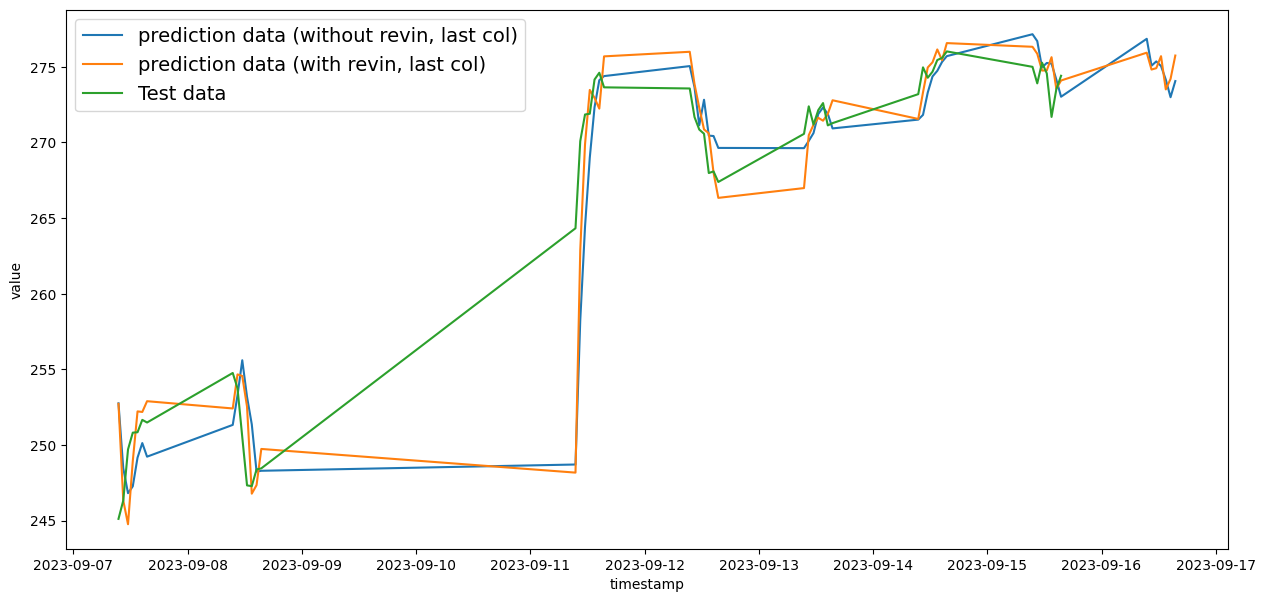

In [ ]:
plt.figure(figsize=(15, 7))
import pandas as pd

new_dates = pd.date_range(start="2023-09-16 09:30", end="2023-09-16 15:30", freq="1H")
new_dates = new_dates.tz_localize('US/Eastern')
new_df = pd.DataFrame(index=new_dates, columns=X_test2.columns)
new_df[:] = pd.NA
extended_X_test2 = pd.concat([X_test2, new_df])

new_dates_y = pd.date_range(start="2023-09-16 09:30", periods=7, freq="1H")
new_dates_y = new_dates_y.tz_localize('US/Eastern')
null_data = pd.Series(data=[None]*7, index=new_dates_y)

concatenated_tensor_wo_revin = tf.concat([model_wo_revin_preds_firstcol[:-1], model_wo_revin_preds_lastcol_seven], axis=0)
concatenated_tensor_w_revin = tf.concat([model_w_revin_preds_firstcol[:-1], model_w_revin_preds_lastcol_seven], axis=0)
y_test2_extended = pd.concat([y_test2, null_data])

plt.plot(extended_X_test2.index, concatenated_tensor_wo_revin, label="prediction data (without revin)")
plt.plot(extended_X_test2.index, concatenated_tensor_w_revin, label="prediction data (with revin)")
plt.plot(extended_X_test2.index, y_test2_extended , label="Test data")
plt.xlabel("timestamp")
plt.ylabel("value")
plt.legend(fontsize=14)
plt.show()

Plot prediction results for future timestamp

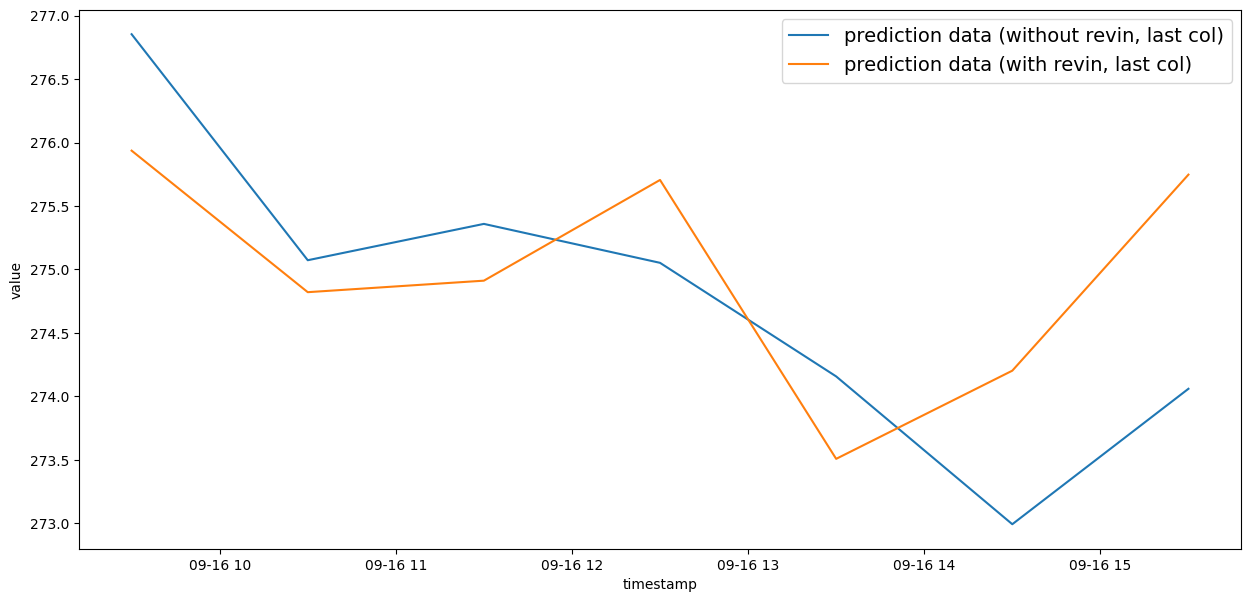

In [ ]:
plt.figure(figsize=(15, 7))
new_date_range = pd.date_range(start="2023-09-16 09:30", end="2023-09-16 15:30", freq="1H")
plt.plot(new_date_range, model_wo_revin_preds_lastcol_seven, label="prediction data (without revin)")
plt.plot(new_date_range, model_w_revin_preds_lastcol_seven, label="prediction data (with revin)")

plt.xlabel("timestamp")
plt.ylabel("value")
plt.legend(fontsize=14)
plt.show()